In [1]:
import numpy as np
import jax.numpy as jnp
from jax import grad, jit, vmap, scipy
import jax
import sympy
from radius_of_convergence import taylor_approx, truncated_fft

In [2]:
x = sympy.Symbol('x')

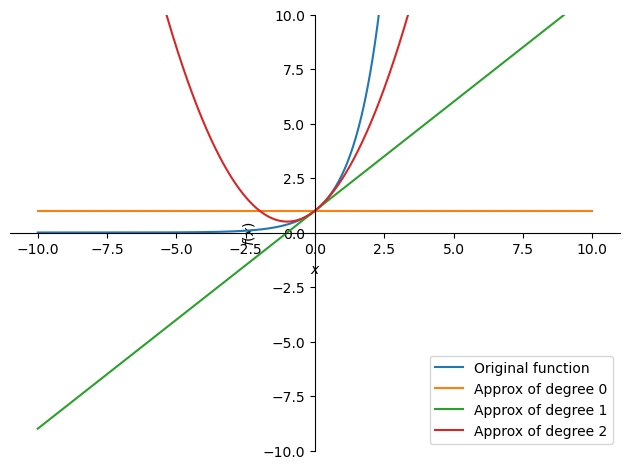

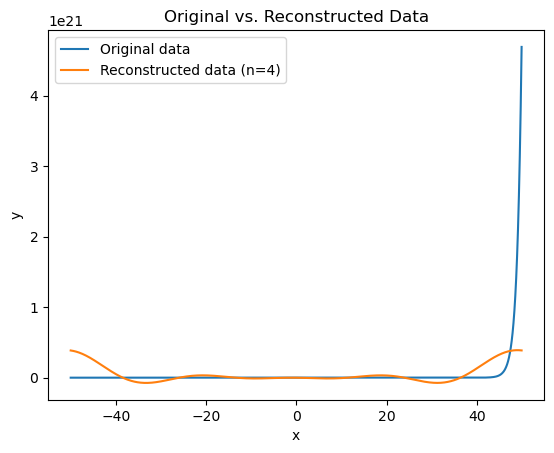

In [5]:
def func1(x):
    return jnp.exp(x)
func1_expr = sympy.exp(x)

p1 = sympy.plot(func1_expr, (x, -10, 10), show=False, label="Original function", legend=True, ylim=(-10, 10))
for i in range(3):
     func1_approx = taylor_approx(func1, 0.0, i)
     p2 = sympy.plot(func1_approx, (x, -10, 10), color='red', show=False, label=f"Approx of degree {i}", ylim=(-10, 10))
     p1.extend(p2)
p1.show()

coefs, reconstructed = truncated_fft(func1, n_terms=4, plot=True, N=1000, ds=0.1)


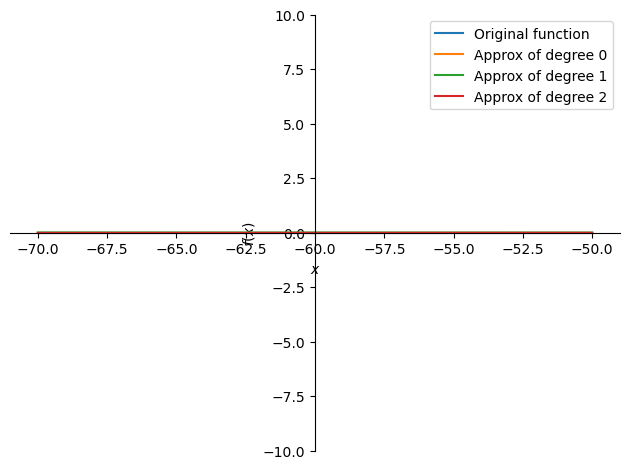

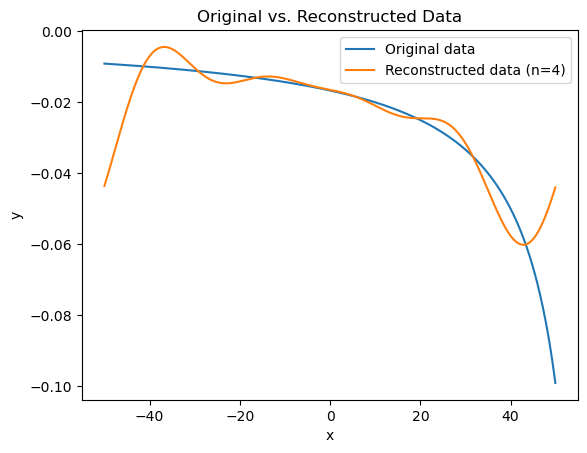

In [15]:
def func1(x):
    return jnp.power(x-60, -1)
func1_expr = (x-60) **(-1)

p1 = sympy.plot(func1_expr, (x, -70, -50), show=False, label="Original function", legend=True, ylim=(-10, 10))
for i in range(3):
     func1_approx = taylor_approx(func1, 0.0, i)
     p2 = sympy.plot(func1_approx, (x, -70, -50), color='red', show=False, label=f"Approx of degree {i}", ylim=(-10, 10))
     p1.extend(p2)
p1.show()

coefs, reconstructed = truncated_fft(func1, n_terms=4, plot=True, N=1000, ds=0.1)


In [75]:
coefs

0.0128582598770764*sin(0.02*pi*x) + 0.00945131772626179*sin(0.04*pi*x) + 0.00736671942550255*sin(0.06*pi*x) + 0.00600079632205449*sin(0.08*pi*x) - 0.0106107979631041*cos(0.02*pi*x) - 0.00517981549609001*cos(0.04*pi*x) - 0.00309201284777141*cos(0.06*pi*x) - 0.00205158565903073*cos(0.08*pi*x) - 0.0239789072736464

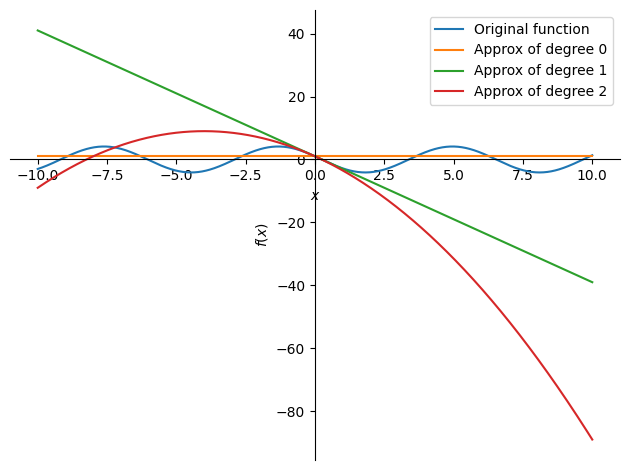

In [50]:
def func1(x):
   return -4 * jnp.sin(x) + jnp.cos(x)
func1_expr = -4 * sympy.sin(x) + sympy.cos(x)

p1 = sympy.plot(func1_expr, (x, -10, 10), show=False, label="Original function", legend=True)
for i in range(3):
    func1_approx = taylor_approx(func1, 0.0, i)
    p2 = sympy.plot(func1_approx, (x, -10, 10), color='red', show=False, label=f"Approx of degree {i}")
    p1.extend(p2)
p1.show()